In [150]:
import sqlite3
import numpy as np
from sklearn.manifold import TSNE

In [151]:
# Variable to toggle printouts
debug = False

In [152]:
conn = sqlite3.connect('livs.db')  # Create db and establish connection
conn.row_factory = sqlite3.Row
curs = conn.cursor()
columnObject = []

#Kolla om klusterkolumnen redan finns, annars lägg till den        
for row in conn.execute('PRAGMA table_info (livs);'):
    columnObject.append(row)
#print (columnObject)
columns = np.array(columnObject).tolist()

conn.close()

In [153]:
for column in columns:
    print (column[0],column[1])

0 Livsmedelsnamn
1 Livsmedelsnummer
2 Energi_kcal
3 Energi_kJ
4 Kolhydrater_g
5 Fett_g
6 Protein_g
7 Fibrer_g
8 Vatten_g
9 Alkohol_g
10 Aska_g
11 Monosackarider_g
12 Disackarider_g
13 Sackaros_g
14 Fullkorn_totalt_g
15 Sockerarter_g
16 Summa_mattade_fettsyror_g
17 Fettsyra_4_0_10_0_g
18 Fettsyra_12_0_g
19 Fettsyra_14_0_g
20 Fettsyra_16_0_g
21 Fettsyra_18_0_g
22 Fettsyra_20_0_g
23 Summa_enkelomattade_fettsyror_g
24 Fettsyra_16_1_g
25 Fettsyra_18_1_g
26 Summa_fleromattade_fettsyror_g
27 Fettsyra_18_2_g
28 Fettsyra_18_3_g
29 Fettsyra_20_4_g
30 EPA_Fettsyra_20_5_g
31 DPA_Fettsyra_22_5_g
32 DHA_Fettsyra_22_6_g
33 Kolesterol_mg
34 Retinol_mikrog
35 Vitamin_A_mikrog
36 beta_Karoten_mikrog
37 Vitamin_D_mikrog
38 Vitamin_E_mg
39 Vitamin_K_mikrog
40 Tiamin_mg
41 Riboflavin_mg
42 Vitamin_C_mg
43 Niacin_mg
44 Niacinekvivalenter_mg
45 Vitamin_B6_mg
46 Vitamin_B12_mikrog
47 Folat_mikrog
48 Fosfor_mg
49 Jod_mikrog
50 Jarn_mg
51 Kalcium_mg
52 Kalium_mg
53 Magnesium_mg
54 Natrium_mg
55 Salt_g
56 Selen_

In [154]:
# Välj vilka näringsvärden som ska läsas ur databasen. Gör en lista av dem i valueList
valueList = [0,1,3,4,5,6,7,8,9]
columnsToQuery=[]
for index, item in enumerate(valueList):
    columnsToQuery.append(columns[item][1])

# Gör en sträng av listan av kolumner
columnsToQuery = ', '.join(columnsToQuery)
if debug:
    print (columnsToQuery)

In [168]:
conn = sqlite3.connect('livs.db')  # Create db and establish connection
conn.row_factory = sqlite3.Row
curs = conn.cursor()
result = []
rows = curs.execute('select '+columnsToQuery+' from livs limit 150')
for row in rows:
        result.append(row)

rows = np.array(result)
print (rows)

conn.close()

[['Talg nöt' '1' '2746.0' ..., '0.0' '21.7' '0.0']
 ['Späck gris' '2' '3192.6' ..., '0.0' '11.1' '0.0']
 ['Ister gris' '3' '3700.0' ..., '0.0' '0.0' '0.0']
 ..., 
 ['Hårt bröd fullkorn råg fibrer 15,5% Wasa delikatess' '175' '1467.9' ...,
  '15.5' '5.3' '0.0']
 ['Hårt bröd fullkorn havre vete råg mjölk fibrer 8% Wasa havre' '178'
  '1585.5' ..., '8.0' '7.5' '0.0']
 ['Hårt bröd vete vallmofrö fibrer 6% Wasa frukost' '180' '1700.4' ...,
  '6.0' '5.0' '0.0']]


In [169]:
allFactors = np.array(result)
dataSet = allFactors[:,2:]

In [170]:
if debug:
    print (dataSet)

In [187]:
X_embedded = TSNE(n_components=2).fit_transform(dataSet)

In [188]:
X_embedded.shape


(150, 3)

In [189]:
X_embedded

array([[  8.95438309e+01,   6.88715820e+01,  -2.13197970e+00],
       [  1.20985527e+02,   3.75796051e+01,   4.66387787e+01],
       [  1.13731026e+02,  -7.76044273e+00,   5.31107674e+01],
       [  6.42945557e+01,   6.05007553e+01,   7.89714127e+01],
       [  9.46003571e+01,   2.58287277e+01,   8.23131332e+01],
       [  2.57039700e+01,   1.39161098e+00,   9.24069748e+01],
       [  6.06845589e+01,   1.13171539e+02,   6.09633522e+01],
       [ -2.79563117e+00,   3.16842384e+01,   8.92657471e+01],
       [  5.04866714e+01,  -9.37496376e+00,   6.17133408e+01],
       [  1.13282875e+02,   1.11379021e+02,   4.99921265e+01],
       [  8.45929108e+01,   8.12824707e+01,   3.88028564e+01],
       [  1.14868179e+02,   1.07722328e+02,   3.76788545e+00],
       [  7.18232059e+00,   1.09097275e+02,   1.03432487e+02],
       [ -1.59031000e+01,  -2.72607632e+01,  -1.33081482e+02],
       [  7.34773493e+00,   1.27028137e+02,  -8.55152817e+01],
       [  1.09598221e+02,   6.74884949e+01,   7.1064025

In [182]:
X_embedded.ndim

2

In [183]:
np.amax(X_embedded.T[0])

12.683095

In [184]:
x=X_embedded.T[0]
y=X_embedded.T[1]


In [185]:
import matplotlib.pyplot as plt

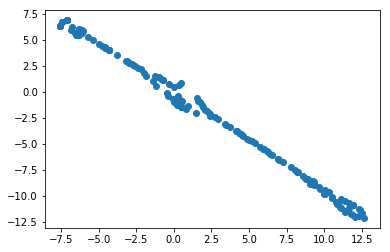

In [186]:

plt.scatter(x,y)
plt.show()

In [166]:
str(allFactors.T[1, index])+' '+str(allFactors.T[0, index])

'9 Bordsmargarin mjölkfri fett 60% berikad typ Milda'

In [167]:
for index, item in allFactors.T:
    labels [index] = str(allFactors.T[1, index])+' '+str(allFactors.T[0, index])
labels

ValueError: too many values to unpack (expected 2)

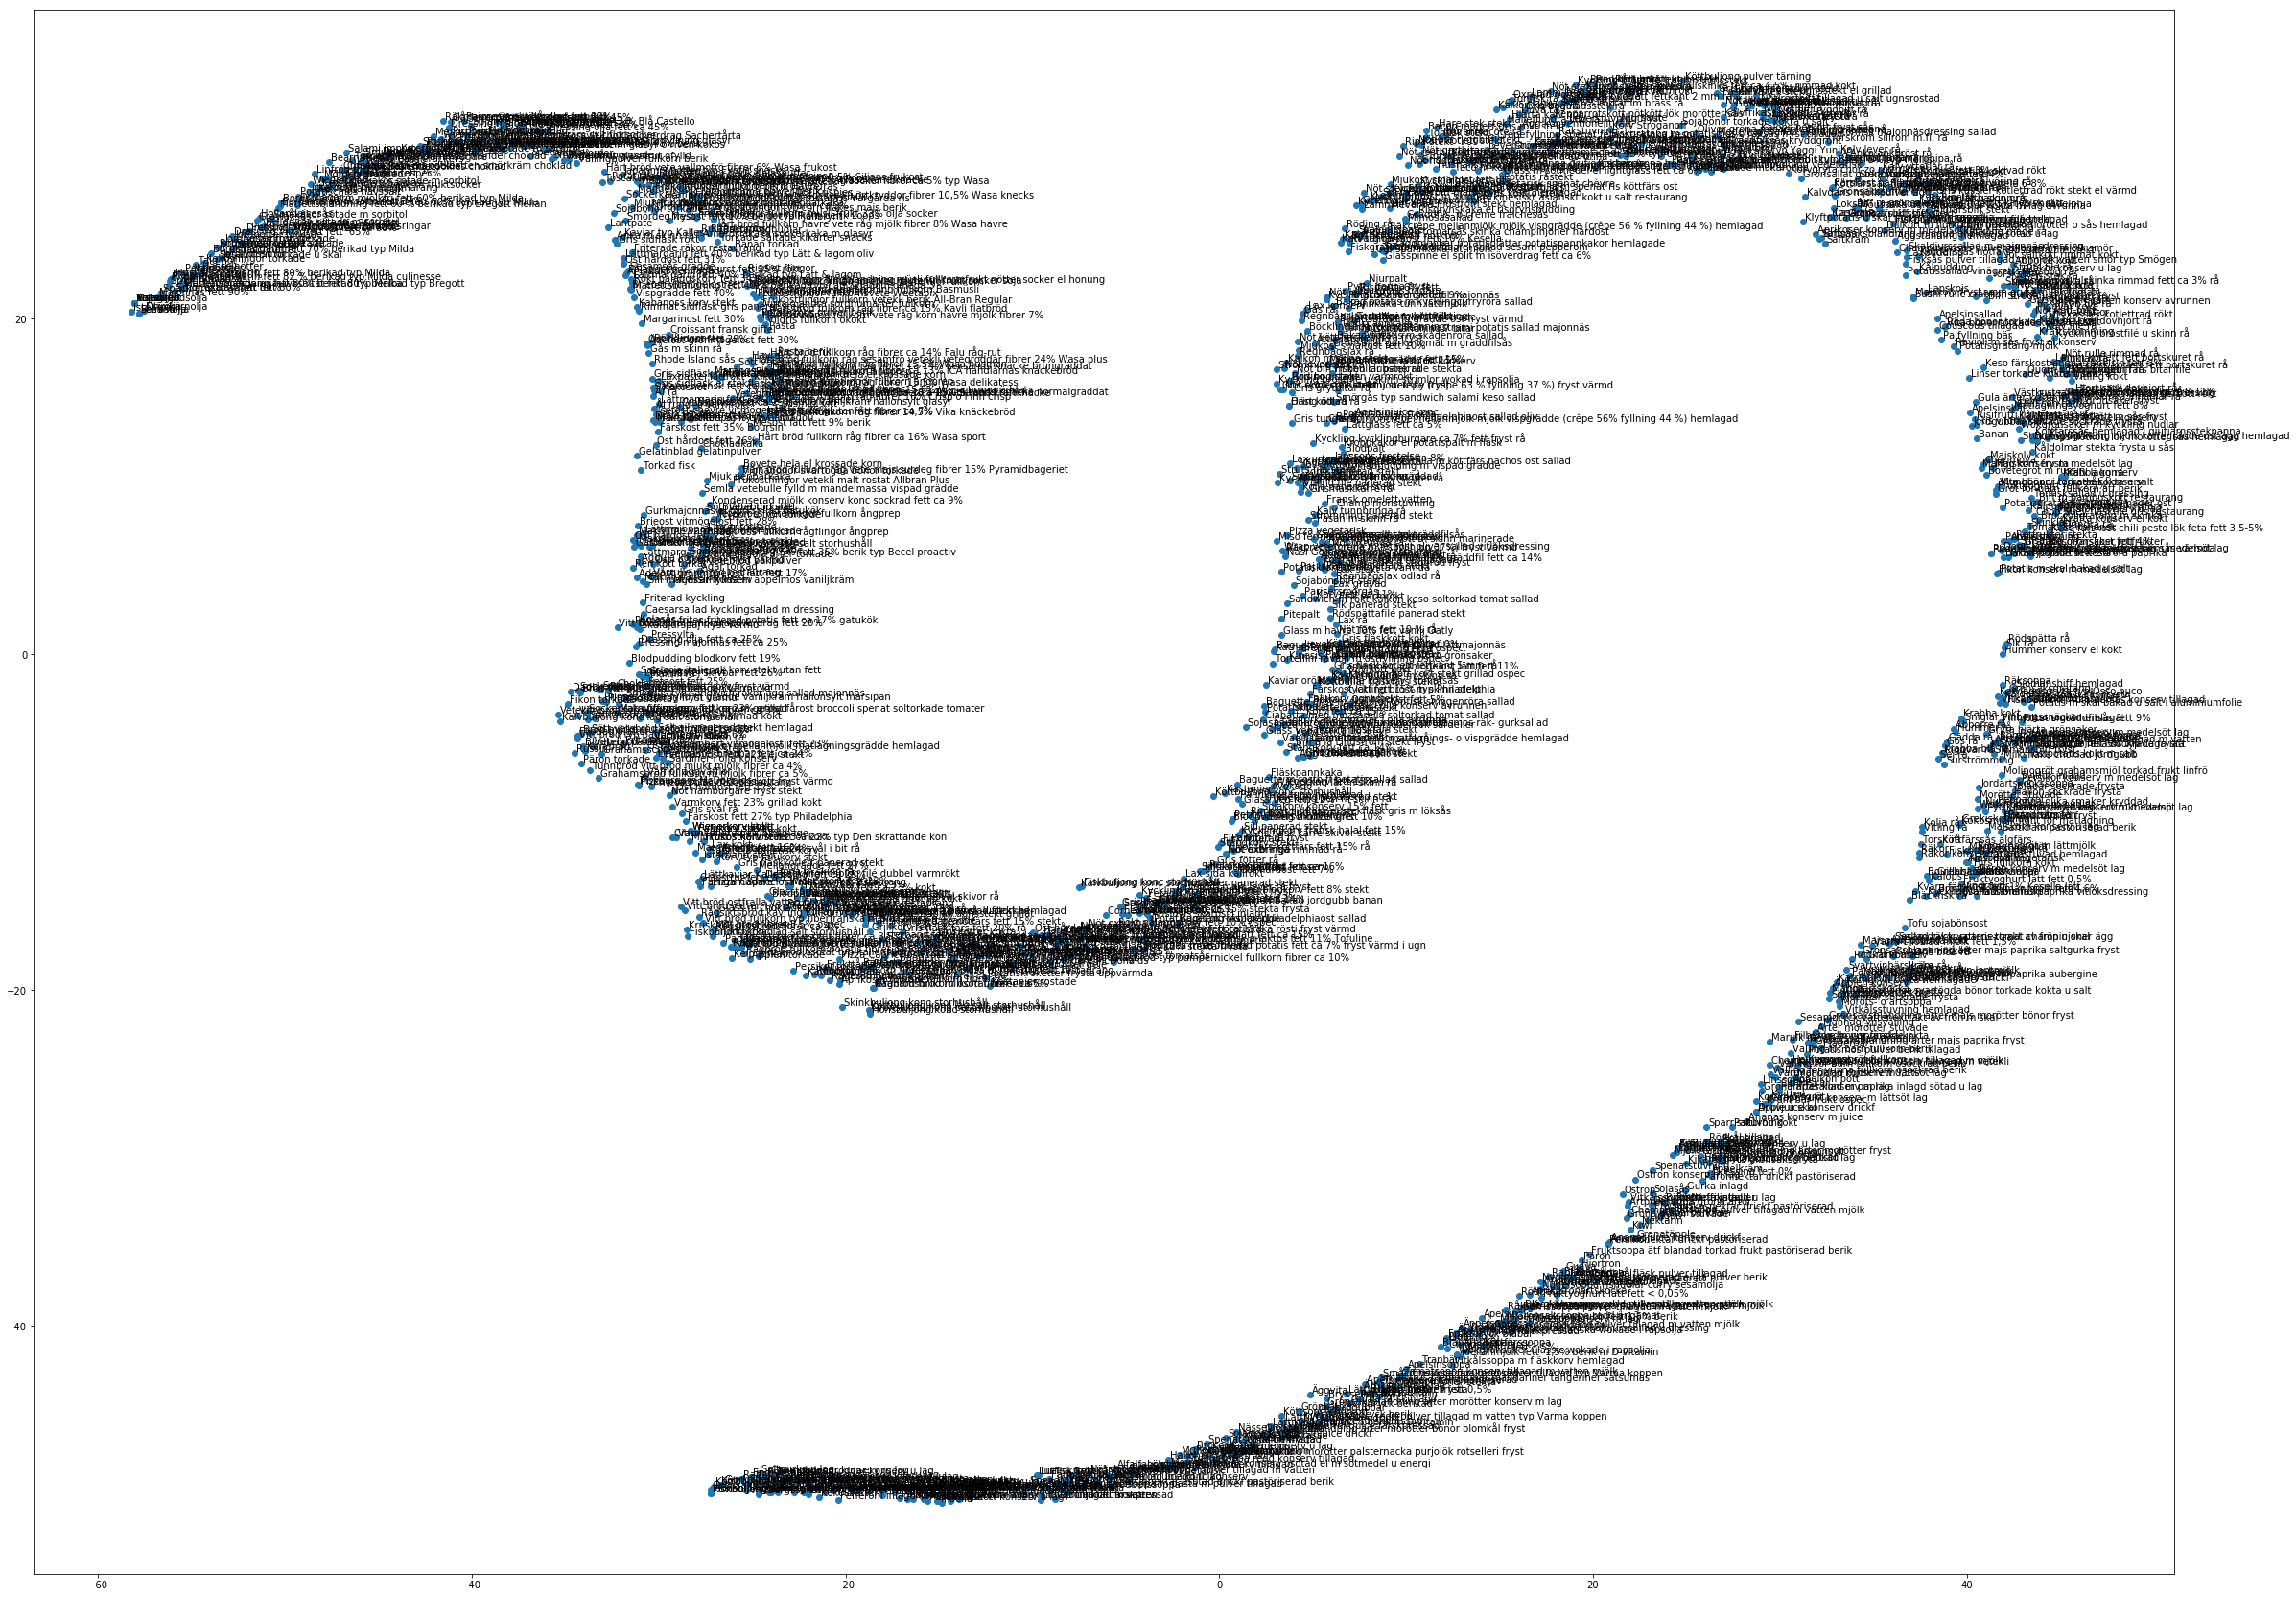

In [139]:
fig, ax = plt.subplots(figsize=(40, 30))
ax.scatter( x, y )

for i, txt in enumerate( labels ):
    ax.annotate( txt, ( x[i] + .1, y[i] + .1 ) )

plt.show()

In [140]:
fig.savefig('test.png', bbox_inches='tight')